In [4]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Output hidden; open in https://colab.research.google.com to view.

# Task
Build a Streamlit application to load, explore, visualize, and interact with the "Tweets.csv" dataset. The application should include features to display tweets in the sidebar, plot interactive bar plots and pie charts, plot location data on an interactive map, plot the number of tweets by sentiment for each airline, and generate word clouds for different sentiment categories.

## Install streamlit and other necessary libraries

### Subtask:
Install `streamlit`, `pandas`, `plotly`, and `wordcloud` using pip.


**Reasoning**:
Install the required packages for the Streamlit application.



In [5]:
!pip install streamlit pandas plotly wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.5 MB/s eta 0:00:00


## Load the twitter us airline sentiment data

### Subtask:
Load the data from the uploaded CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the uploaded CSV file into a pandas DataFrame and display the head and info.



In [6]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Tweets.csv']))
display(df.head())
display(df.info())

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

None

## Create the streamlit app structure

### Subtask:
Set up the basic structure of the Streamlit application.


**Reasoning**:
Import the streamlit library and set up the basic structure of the Streamlit application with a title and introductory text.



In [7]:
import streamlit as st

st.title("Twitter US Airline Sentiment Analysis")
st.write("Explore and visualize the sentiment of tweets about US airlines.")

2025-10-18 17:59:42.290 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 17:59:42.490 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-18 17:59:42.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 17:59:42.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 17:59:42.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 17:59:42.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 17:59:42.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## Display tweets in the sidebar

### Subtask:
Add a section to the sidebar to display tweets based on user selection.


**Reasoning**:
Add a section to the sidebar to display tweets based on user selection.



In [8]:
st.sidebar.header("View Tweets")

# Select airline
airline = st.sidebar.selectbox("Select an Airline", df['airline'].unique())

# Filter by airline
airline_tweets = df[df['airline'] == airline]

# Select sentiment
sentiment = st.sidebar.selectbox("Select Sentiment", ['all', 'positive', 'neutral', 'negative'])

# Filter by sentiment
if sentiment != 'all':
    filtered_tweets = airline_tweets[airline_tweets['airline_sentiment'] == sentiment]
else:
    filtered_tweets = airline_tweets

# Display tweets
st.sidebar.subheader(f"{sentiment.capitalize()} Tweets for {airline}")
for i, row in filtered_tweets.head(10).iterrows(): # Display up to 10 tweets
    st.sidebar.write(f"- {row['text']}")

2025-10-18 18:00:00.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:00:00.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:00:00.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:00:00.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:00:00.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:00:00.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:00:00.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:00:00.571 Session state does not function when running a script without `streamlit run`
2025-10-18 18:00

## Plot interactive bar plots and pie charts

### Subtask:
Generate interactive bar plots and pie charts to visualize sentiment distribution.


**Reasoning**:
Generate and display interactive bar plots and pie charts to visualize the sentiment distribution using plotly.express.



In [9]:
import plotly.express as px

st.subheader("Sentiment Distribution Across All Tweets")

# Create bar plot
sentiment_counts = df['airline_sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']
bar_fig = px.bar(sentiment_counts, x='sentiment', y='count', title='Sentiment Distribution')
st.plotly_chart(bar_fig)

# Create pie chart
pie_fig = px.pie(sentiment_counts, values='count', names='sentiment', title='Sentiment Proportion')
st.plotly_chart(pie_fig)

2025-10-18 18:01:13.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:13.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:13.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:14.349 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:14.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:14.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:14.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:14.354 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

## Plotting location data on an interactive map

### Subtask:
Visualize tweet locations on an interactive map.


**Reasoning**:
Filter the DataFrame to include only rows with non-null tweet coordinates, extract latitude and longitude, create a new DataFrame with these coordinates, and display the locations on an interactive map using st.map.



In [10]:
st.subheader("Tweet Locations")

# Filter for tweets with coordinates
tweets_with_coords = df.dropna(subset=['tweet_coord'])

# Extract latitude and longitude
# Assuming tweet_coord is in the format "[latitude, longitude]"
tweets_with_coords['tweet_coord'] = tweets_with_coords['tweet_coord'].astype(str)
coords = tweets_with_coords['tweet_coord'].str.replace('[', '').str.replace(']', '').str.split(', ', expand=True)
coords.columns = ['lat', 'lon']
coords['lat'] = pd.to_numeric(coords['lat'])
coords['lon'] = pd.to_numeric(coords['lon'])

# Display map
st.map(coords)

2025-10-18 18:01:30.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:30.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:30.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/tmp/ipython-input-2664215376.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2025-10-18 18:01:30.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:30.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:30.193 Thread 'MainThread':

DeltaGenerator()

## Plot number of tweets by sentiment for each airline

### Subtask:
Create plots to show the number of tweets by sentiment for each airline.


**Reasoning**:
Group the data by airline and sentiment, count the occurrences, rename columns, and create an interactive bar plot using plotly.



In [11]:
import plotly.express as px

st.subheader("Number of Tweets by Sentiment for Each Airline")

# Group by airline and sentiment and count
airline_sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().reset_index()

# Rename columns
airline_sentiment_counts.columns = ['airline', 'sentiment', 'count']

# Create interactive bar plot
bar_fig_airline_sentiment = px.bar(airline_sentiment_counts,
                                    x='airline',
                                    y='count',
                                    color='sentiment',
                                    title='Number of Tweets by Sentiment for Each Airline')

# Display the plot
st.plotly_chart(bar_fig_airline_sentiment)

2025-10-18 18:01:47.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:47.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:47.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:47.959 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:47.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:47.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:47.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:01:47.963 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

## Word cloud for positive, neutral, and negative tweets

### Subtask:
Generate word clouds for different sentiment categories.


**Reasoning**:
Generate word clouds for each sentiment category using the provided DataFrame and display them in the Streamlit app.



2025-10-18 18:02:21.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:02:21.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:02:21.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:02:21.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:02:21.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:02:21.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:02:22.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 18:02:23.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

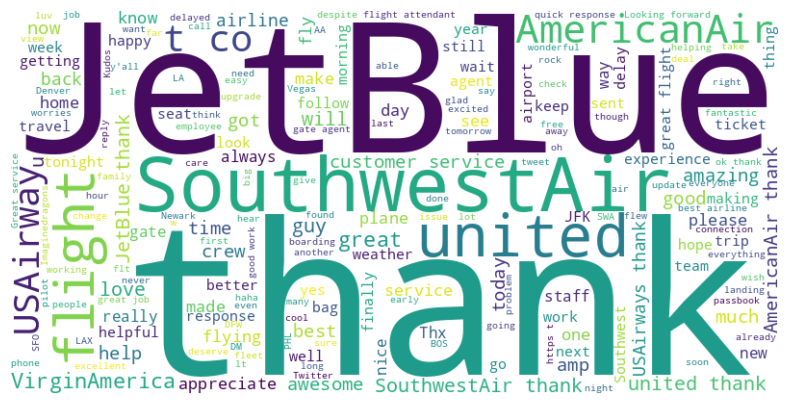

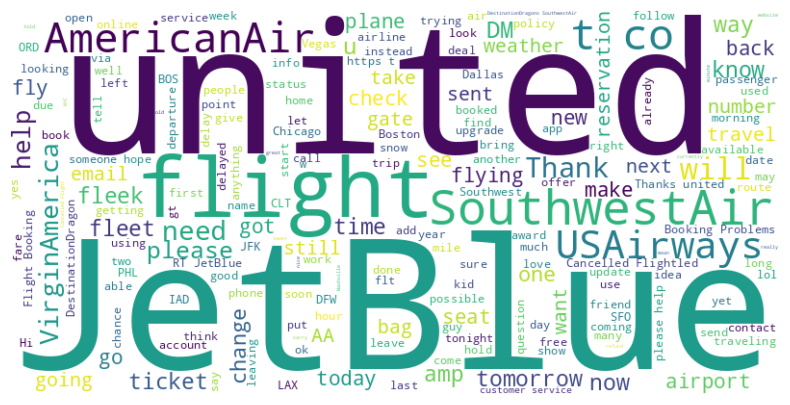

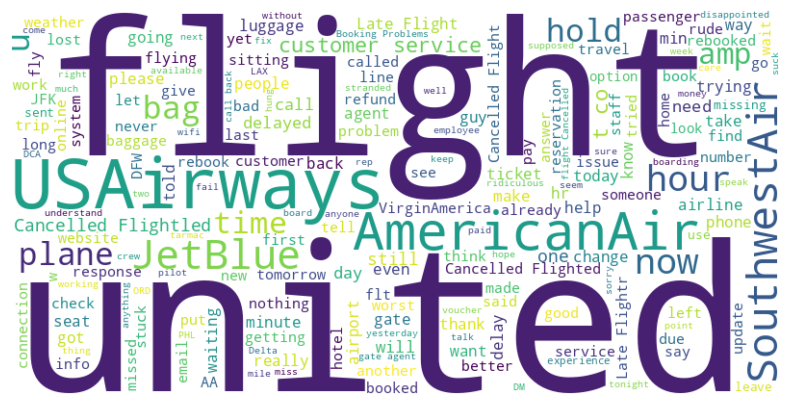

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(dataframe, sentiment):
    """Generates a word cloud for a specific sentiment."""
    filtered_text = dataframe[dataframe['airline_sentiment'] == sentiment]['text'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(filtered_text)
    return wordcloud

st.subheader("Word Clouds by Sentiment")

# Sentiments to generate word clouds for
sentiments = ['positive', 'neutral', 'negative']

for sentiment in sentiments:
    st.write(f"### {sentiment.capitalize()} Tweets Word Cloud")
    wordcloud = create_wordcloud(df, sentiment)

    # Display the word cloud
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    st.pyplot(fig)